In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as sklearnLogit
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Hypothesis
$$h(x) = \frac{1}{1 + e^{-\theta^T x + b}}$$

# Cost function
$$J(\theta) = -\frac1m \sum_{i=1}^{m} \left[y^{(i)}\log(h(x^{(i)})) + (1-y^{(i)}) \log(1-h(x^{(i)}))\right] $$

# Partial derivatives of the cost function
$$\frac{\partial J}{\partial \theta_j} = \frac1m \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

In [2]:
class LogisticRegression:
    
    def __init__(self):
        self.weights = None
        self.bias = None
        
    # Class methods
    def fit(self, X, y, α=0.001, max_iter=10**6, tols=1e-8):
        m, n = X.shape
        old_weights = np.zeros(n)
        old_bias = 0
        
        # Gradient descent
        for _ in range(max_iter):
            new_weights = old_weights - α * (1/m) * np.dot(X.T, (self.__sigmoid(np.dot(X, old_weights) + old_bias) - y))
            new_bias = old_bias - α * (1/m) * np.sum(self.__sigmoid(np.dot(X, old_weights) + old_bias) - y)
            
            # Stopping criterion
            if (np.linalg.norm(new_weights - old_weights) > tols) and (np.abs(new_bias - old_bias) > tols):
                old_weights = new_weights
                old_bias = new_bias
                
            else:
                print("Converged after {} iterations.".format(_))
                break
                
        # Best wieghts and bias
        self.weights = new_weights
        self.bias = new_bias
    
    def predict(self, X):
        y_predicted = self.__sigmoid(np.dot(X, self.weights) + self.bias)
        return np.array([1 if i >= 0.5 else 0 for i in y_predicted])
    
    def accuracy_score(self, y_test_true, y_test_pred):
        return np.sum(y_test_true == y_test_pred) / len(y_test_true)
    
    def __sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

# Import breast cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()
X, y = bc_data.data, bc_data.target


# Split into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Train the model

In [4]:
logit = LogisticRegression()
logit.fit(X_train,y_train, α=0.0001)

Converged after 1416 iterations.


### Make predictions

In [5]:
y_test_predicted = logit.predict(X_test)
logit.accuracy_score(y_test, y_test_predicted)

0.8859649122807017

# Scikit-learn implementation

In [6]:
clf = sklearnLogit(random_state=0).fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

C:\Users\tonba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9298245614035088

# Fitting a circle to circular data

Equation of a circle:
$$(x-a)^2 + (y-b)^2 = R^2$$

### Generate data

<IPython.core.display.Javascript object>


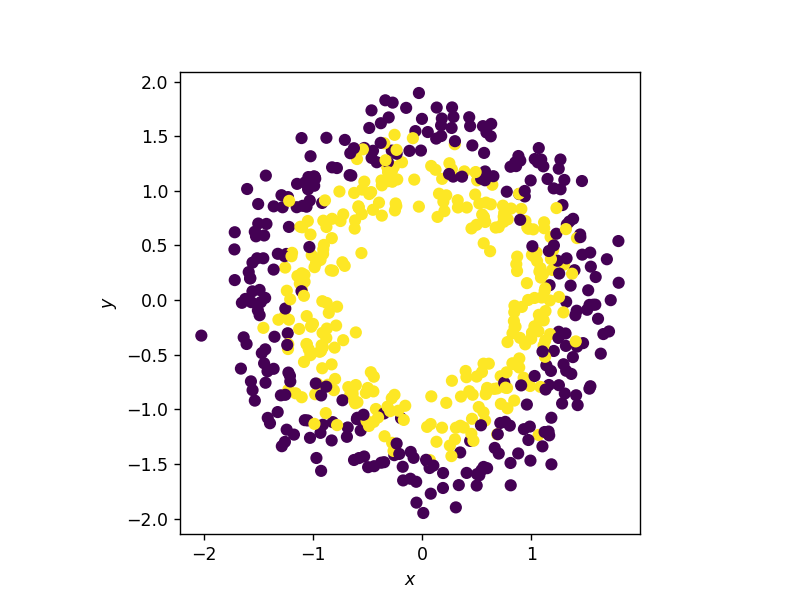

Text(0, 0.5, '$y$')

In [7]:
R1 = 1.1 # Radius of first circle
R2 = 1.5 # Radius of second circle
a,b = (0,0) # Position of center

# Generate data using polar coordinates
noise1 = 0.2
noise2 = 0.2
t = np.linspace(0,8*2*np.pi,300)
X1 = np.array([R1 * np.cos(t) + a + np.random.normal(0, noise1, len(t)), R1 * np.sin(t) + b + np.random.normal(0, noise1, len(t))]).T
X2 = np.array([R2 * np.cos(t) + a + np.random.normal(0, noise2, len(t)), R2 * np.sin(t) + b + np.random.normal(0, noise2, len(t))]).T

y1 = np.ones(len(X1))
y2 = np.zeros(len(X2))

X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2))

# Make new features, (quadratic terms)
new_features = []
for i in range(len(X.T)):
    new_features.append(X.T[i]**2) 
new_features = np.array(new_features)

# Concatenate the new features
X = np.column_stack((X,new_features[0])) 
X = np.column_stack((X,new_features[1]))

# Shuffle the data
X = np.column_stack((X,y)) # temporarily stack X and y for shuffling
np.random.shuffle(X) # Shuffle
y = np.int32(X.T[-1]) # get the y column
X = X.T[:-1].T

# Plot the data
plt.figure()
plt.scatter(X.T[0], X.T[1], c=y)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

Yellow is the positive class, violet is negative class

### We assume the hypothesis to be

$$h(x) = g(\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_2^2)$$ where $$g(z) = \frac{1}{1 + e^{-z}}$$

### Split the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Fit the data

In [9]:
logit = LogisticRegression()
logit.fit(X_train, y_train, α=7)

Converged after 914 iterations.


### Make predictions

In [10]:
y_test_predicted = logit.predict(X_test)
logit.accuracy_score(y_test, y_test_predicted)

0.8083333333333333

### Plot the decision boundary

<IPython.core.display.Javascript object>


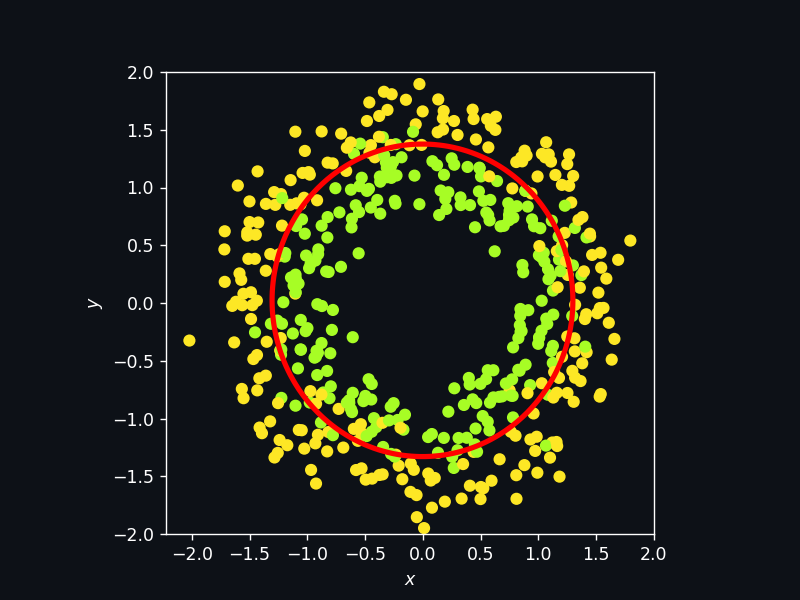

In [11]:
# Code from https://stackoverflow.com/questions/32092899/plot-equation-showing-a-circle
xs, ys = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
F = logit.bias + logit.weights[0]*xs + logit.weights[1]*ys + logit.weights[2]*xs**2 + logit.weights[3]*ys**2 # Function for decision boundary

fig = plt.figure(facecolor="#0d1117") # Github background: #0d1117
ax  = fig.add_subplot(1, 1, 1)
ax.set_facecolor("#0d1117")

colors_training_data = []
for y_train_i in  y_train:
    if y_train_i==1:
        colors_training_data.append("#a7fd25") 
        
    if y_train_i==0: 
        colors_training_data.append("#fde725")

plt.scatter(X_train.T[0], X_train.T[1], c=colors_training_data)
plt.contour(xs, ys, F,[0], cmap='bwr_r',linewidths=3)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.gca().set_aspect('equal', adjustable='box')


ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='both', colors='white')

plt.savefig("logit_application", dpi=300)

# Scikit-learn

In [12]:
clf = sklearnLogit(random_state=0).fit(X_train, y_train)
accuracy_score(clf.predict(X_test), y_test)

0.8083333333333333